In [1]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
tfk = tf.keras

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'png'
plt.style.use('ggplot')

### Andmed

In [2]:
X, y = load_digits(10, True)
X /= 255
y = label_binarize(y, classes=list(range(10)))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5150)

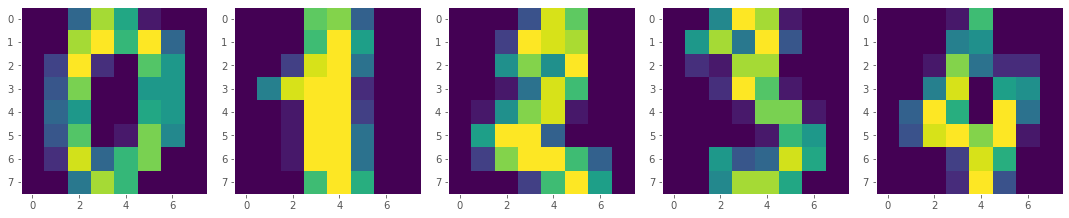

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    axes[i].imshow(X[i].reshape(8, 8))
    axes[i].grid(False)

plt.tight_layout()
plt.show()

### Defineerime mudeli

In [4]:
model = tfk.Sequential([
    tfk.layers.Input(shape=(64)),
    tfk.layers.Dense(128, activation='relu'),
    tfk.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tfk.optimizers.Adam(),
    metrics=['accuracy']
)

### Treenime mudeli

In [5]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10
)

Train on 1347 samples
Epoch 1/10
1347/1347 [==============================] - 0s 334us/sample - loss: 2.2767 - accuracy: 0.2821
Epoch 2/10
1347/1347 [==============================] - 0s 32us/sample - loss: 2.2087 - accuracy: 0.6704
Epoch 3/10
1347/1347 [==============================] - 0s 29us/sample - loss: 2.1112 - accuracy: 0.7439
Epoch 4/10
1347/1347 [==============================] - 0s 29us/sample - loss: 1.9776 - accuracy: 0.7424
Epoch 5/10
1347/1347 [==============================] - 0s 32us/sample - loss: 1.8087 - accuracy: 0.8211
Epoch 6/10
1347/1347 [==============================] - 0s 32us/sample - loss: 1.6214 - accuracy: 0.8114
Epoch 7/10
1347/1347 [==============================] - 0s 33us/sample - loss: 1.4318 - accuracy: 0.8337
Epoch 8/10
1347/1347 [==============================] - 0s 33us/sample - loss: 1.2584 - accuracy: 0.8523
Epoch 9/10
1347/1347 [==============================] - 0s 31us/sample - loss: 1.1052 - accuracy: 0.8604
Epoch 10/10
1347/1347 [=========

### Valideerime mudeli

In [6]:
pred = np.argmax(model.predict(X_test), axis=1)
true = np.argmax(y_test, axis=1)

print(confusion_matrix(true, pred))

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 35  4  0  0  0  1  0  0  3]
 [ 0  2 43  1  0  0  0  0  1  0]
 [ 1  0  0 41  0  0  0  3  1  0]
 [ 0  0  0  0 45  0  0  0  1  0]
 [ 0  0  0  0  1 41  1  0  0  0]
 [ 0  0  0  0  1  0 41  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  8  1  2  0  0  1  0 28  2]
 [ 0  2  0  9  2  2  0  5  1 29]]
